In [1]:
""" [HIGH-LEVEL SUMMARY OF BLOCKS -
NOT DETAILS OF BEAHVIOR
goal: to plot overview and summary statistics for each day, to track progress of learning """

%load_ext autoreload
%autoreload 2
# %matplotlib notebook

In [52]:
from tools.preprocess import loadSingleData
from tools.utils import *
from tools.plots import * 

# 1) Load a dataset
animal = "Mo";
date = 200205
expt = "pilot"
session = 1

animal = "Pancho";
date = 200226
expt = "pilot"
session = 2

from tools.preprocess import *
filedata = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                      resave_overwrite=False)



found one matching filename: ['/data2/animals/Pancho/200226/200226_134021_pilot_Pancho_2.h5']
found one matching filename: ['/data2/animals/Pancho/200226/200226_134021_pilot_Pancho_2.pkl']
-- loaded presaved data: /data2/animals/Pancho/200226/200226_134021_pilot_Pancho_2.pkl


dict_keys(['TaskSet', 'task_staging', 'params_task', 'behtype', 'adaptive', 'sizes', 'GENERAL'])
dict_keys(['TaskSet', 'task_staging', 'params_task', 'behtype', 'adaptive', 'sizes', 'GENERAL'])
dict_keys(['TaskSet', 'task_staging', 'params_task', 'behtype', 'adaptive', 'sizes', 'GENERAL'])
dict_keys(['TaskSet', 'task_staging', 'params_task', 'behtype', 'adaptive', 'sizes', 'GENERAL'])
dict_keys(['TaskSet', 'task_staging', 'params_task', 'behtype', 'adaptive', 'sizes', 'GENERAL'])
dict_keys(['TaskSet', 'task_staging', 'params_task', 'behtype', 'adaptive', 'sizes', 'GENERAL'])
dict_keys(['TaskSet', 'task_staging', 'params_task', 'behtype', 'adaptive', 'sizes', 'GENERAL'])
dict_keys(['TaskSet', 'task_staging', 'params_task', 'behtype', 'adaptive', 'sizes', 'GENERAL'])
dict_keys(['TaskSet', 'task_staging', 'params_task', 'behtype', 'adaptive', 'sizes', 'GENERAL'])
  
------- block 1 ----- 
Trace (instant)
one_dot
(tot = 3) [3]
MaxFingerRaises =  [[0.]]
inkrate_time =  [6.0, 7.0, 8.0, 9.0, 

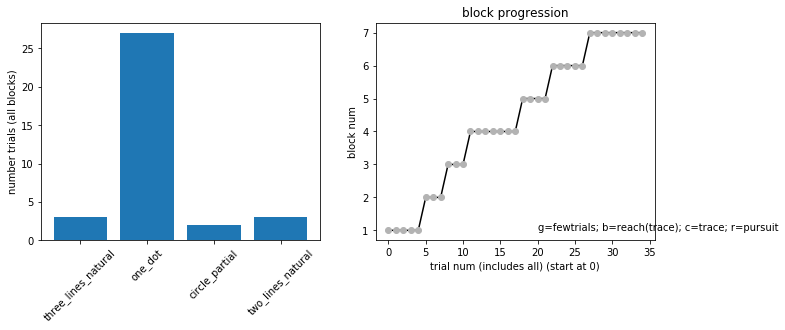

<Figure size 1080x360 with 0 Axes>

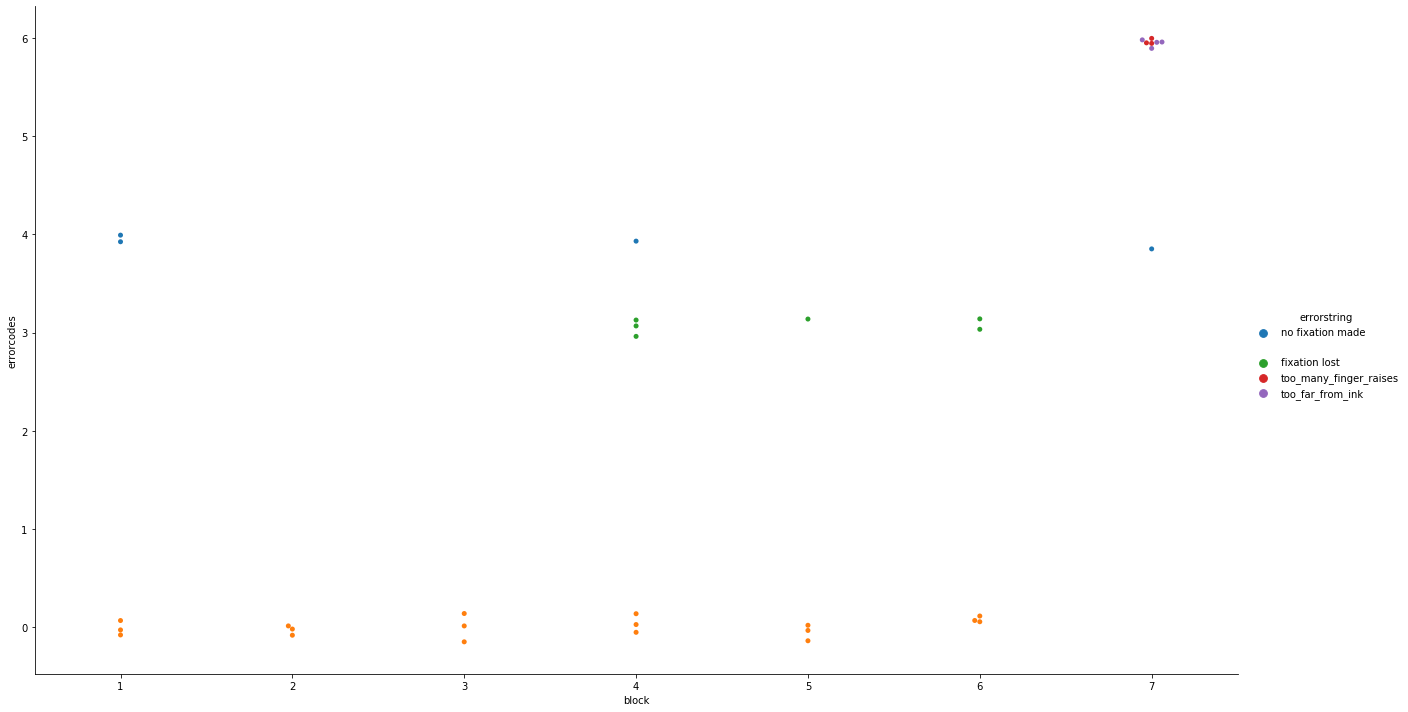

<Figure size 1080x360 with 0 Axes>

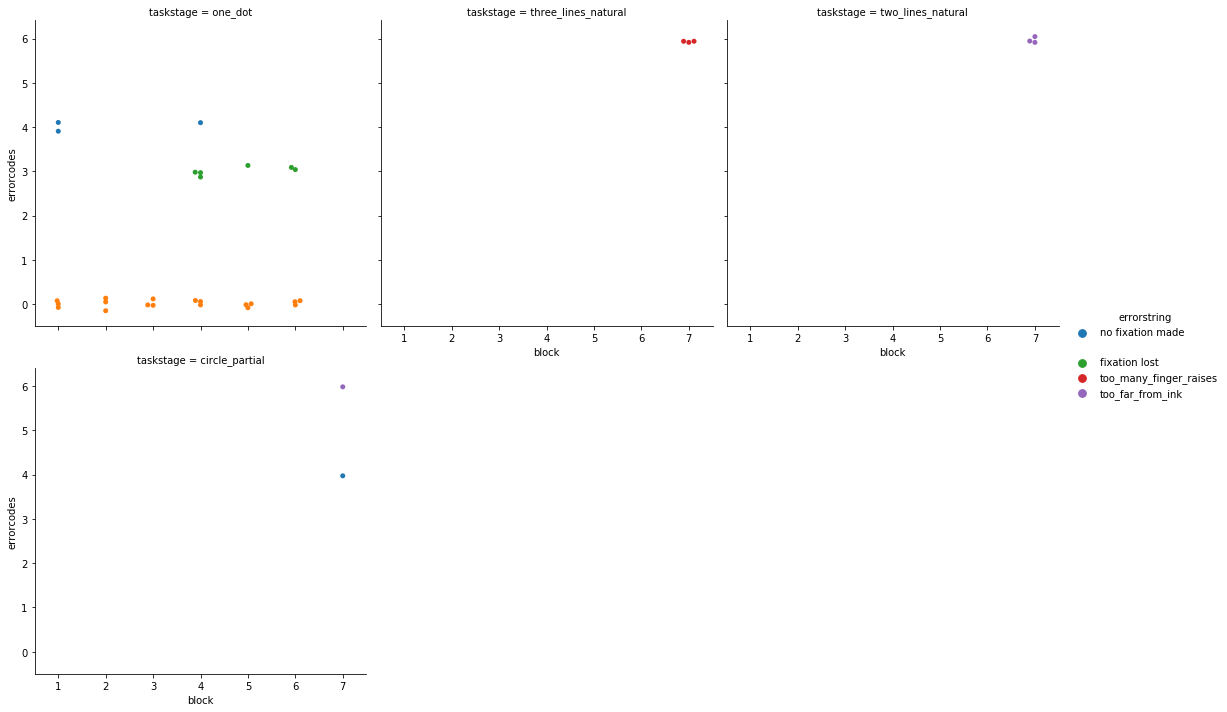

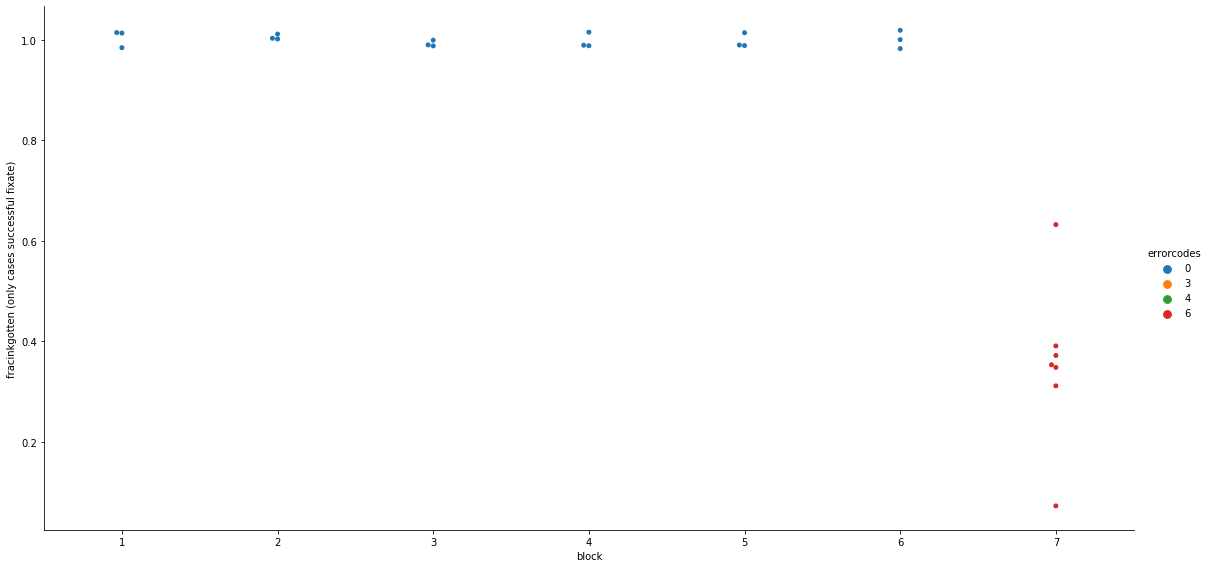

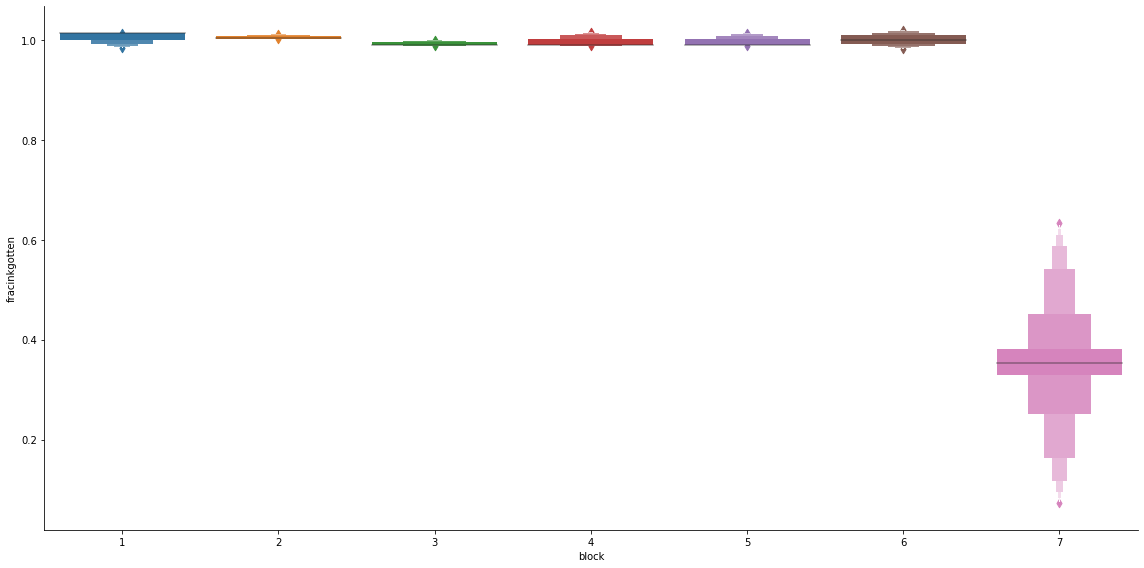

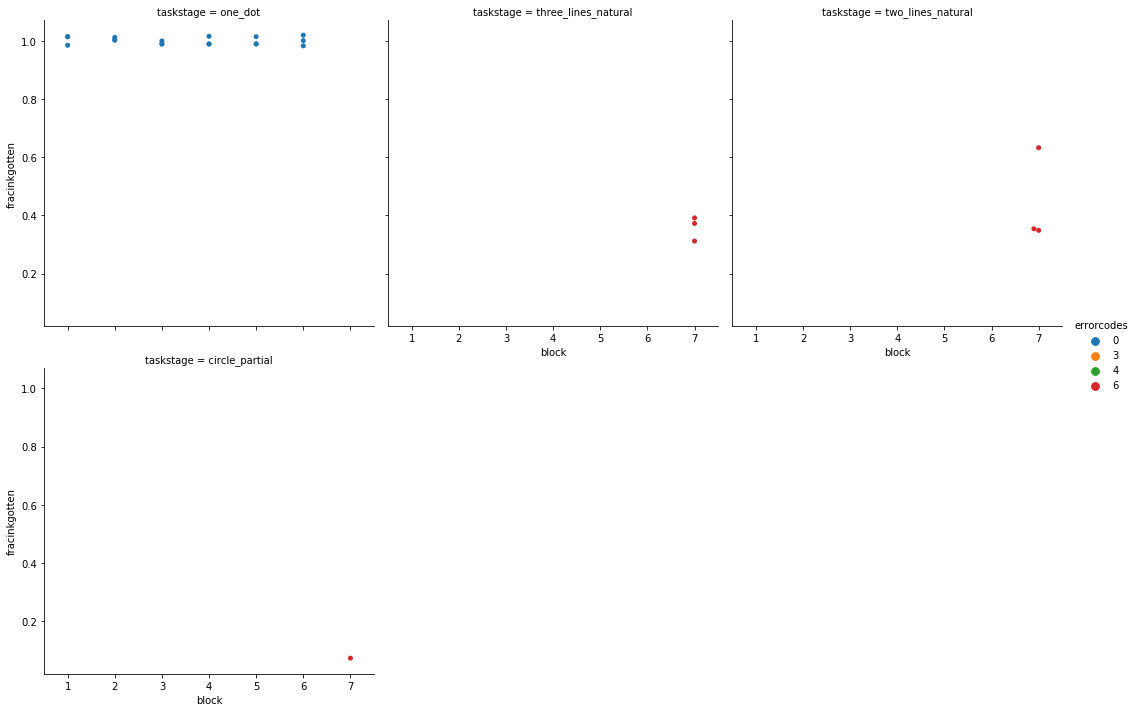

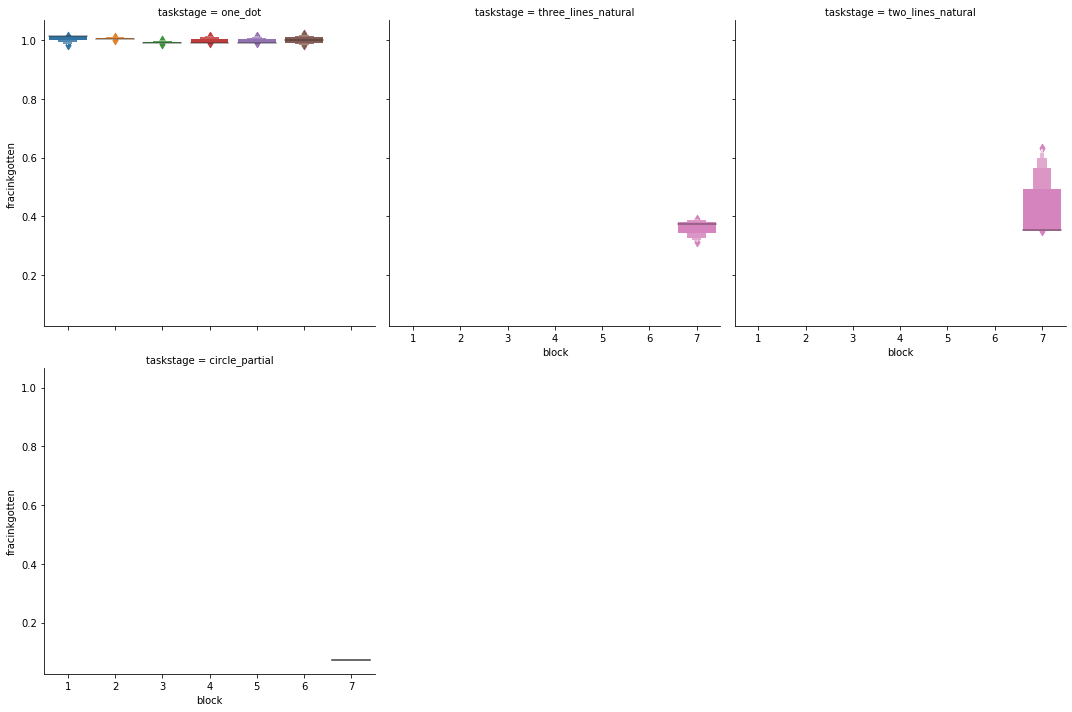

In [97]:
# ===== OVERVIEW PLOTS
# 2) overview for this session (block structure, etc)
from tools.plots import plotOverviewSession

fig, outstring = plotOverviewSession(filedata)
figname = f"{filedata['params']['figuredir_general']}/overview_plot_sess{filedata['params']['session']}.pdf"
fig.savefig(figname)

filename = f"{filedata['params']['figuredir_general']}/overview_print_sess{filedata['params']['session']}.txt"
with open(filename, "w") as f:
    for o in outstring:
        f.write(o)
        f.write("\n")


# 3) errors, frachits for this session
from tools.analy import extractSessionDf
from tools.plots import plotAnalySessionOverview
df = extractSessionDf(filedata)
plotAnalySessionOverview(df, filedata)

# 1) for each trial, make a plot
from tools.plots import plotMultTrialsOverview
plotMultTrialsOverview(filedata, saveon=True)



In [64]:
plotMultTrialsOverview(filedata, saveon=True)

plotMultTrialsOverview(filedata)

[plotmulttrialsoverview] skipping since already exist: /data2/animals/Pancho/200226/figures/1/trialsingleoverview


In [70]:
filedata["params"]["figuredir_general"]

'/data2/animals/Pancho/200226/figures'

  
------- block 1 ----- 
one_dot
(tot = 3) [3]
MaxFingerRaises =  [[0.]]
inkrate_time =  [6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
Trace (instant)
  
------- block 2 ----- 
one_dot
(tot = 3) [3]
MaxFingerRaises =  [[0.]]
inkrate_time =  [6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
Trace (instant)
  
------- block 3 ----- 
one_dot
(tot = 3) [3]
MaxFingerRaises =  [[0.]]
inkrate_time =  [6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
Trace (instant)
  
------- block 4 ----- 
one_dot
(tot = 3) [3]
MaxFingerRaises =  [[0.]]
inkrate_time =  [6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
Trace (instant)
  
------- block 5 ----- 
one_dot
(tot = 3) [3]
MaxFingerRaises =  [[0.]]
inkrate_time =  [6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
Trace (instant)
  
------- block 6 ----- 
one_dot
(tot = 3) [3]
MaxFingerRaises =  [[0.]]
inkrate_time =  [6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
Trace (instant)
  
------- block 7 ----- 
line_natural, two_lines_natural, three_lines_natural, circle_partial
(tot = 4) [1 1 1 1]
MaxFingerRaises

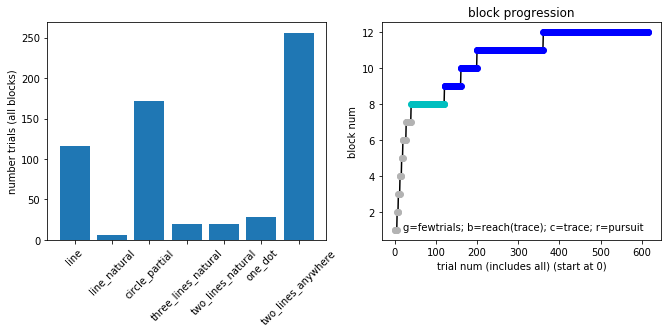

In [88]:
from tools.plots import plotOverviewSession

fig, outstring = plotOverviewSession(filedata)
figname = f"{filedata['params']['figuredir_general']}/overview_plot_sess{filedata['params']['session']}.pdf"
fig.savefig(figname)

filename = f"{filedata['params']['figuredir_general']}/overview_print_sess{filedata['params']['session']}.txt"
with open(filename, "w") as f:
    for o in outstring:
        f.write(o)
        f.write("\n")


In [89]:
# plot histogram of trial outcomes
# obsolete - this gives on list for each block... better to just do a flat datstructure

from tools.utils import *

block_trials = getMultTrialsBlockTrials(filedata)

# for each block, plot the outcomes over all trials
n_blocks = filedata["params"]["n_blocks"]

fracinkgotten_all = []
errorcodes_all = []
for b in range(1,n_blocks+1):
    trials = block_trials[b]

    fracinkgotten_all.append([getTrialsOutcomesAll(filedata, t)["fracinkgotten"] for t in trials])
    errorcodes_all.append([getTrialsOutcomesAll(filedata, t)["errorcode"] for t in trials])
    
# -- plot
# 1) distribution over error codes

    

KeyError: 'n_blocks'

In [90]:
from tools.analy import extractSessionDf

df = extractSessionDf(filedata)


<Figure size 1080x360 with 0 Axes>

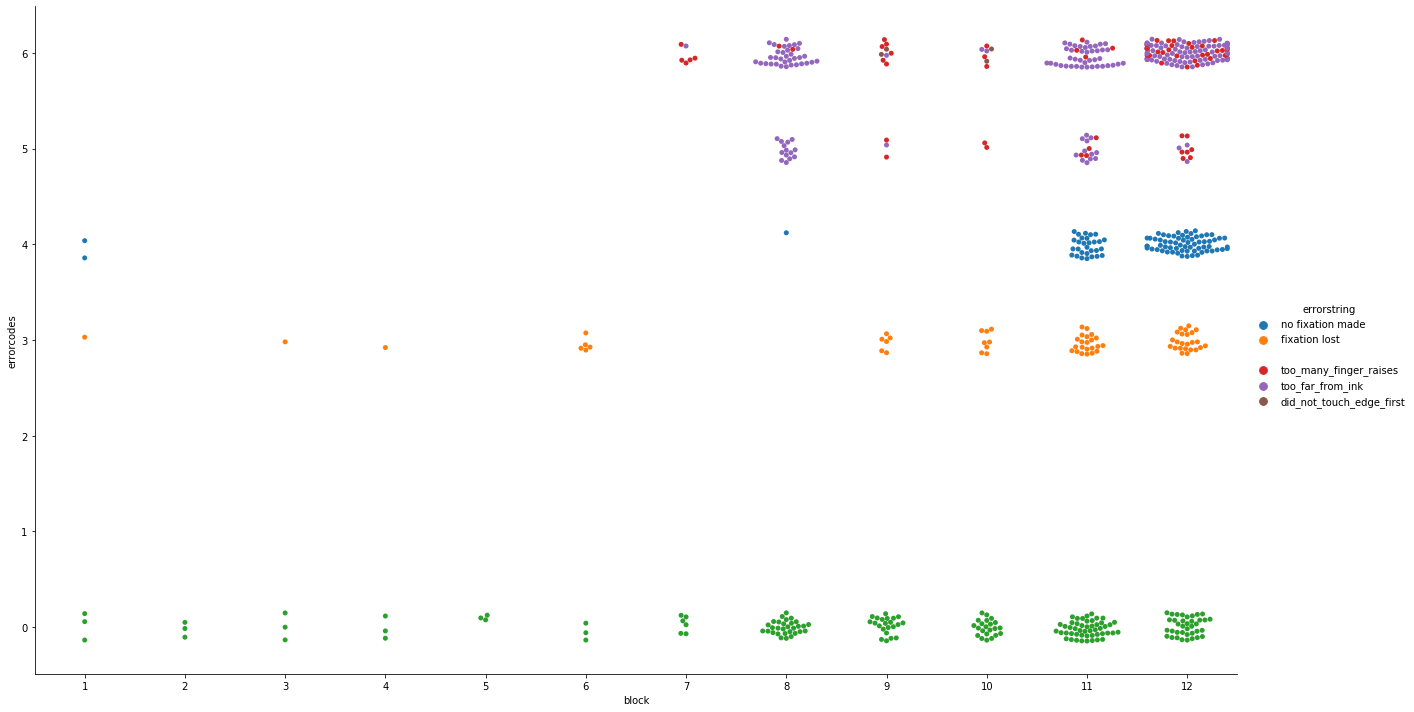

<Figure size 1080x360 with 0 Axes>

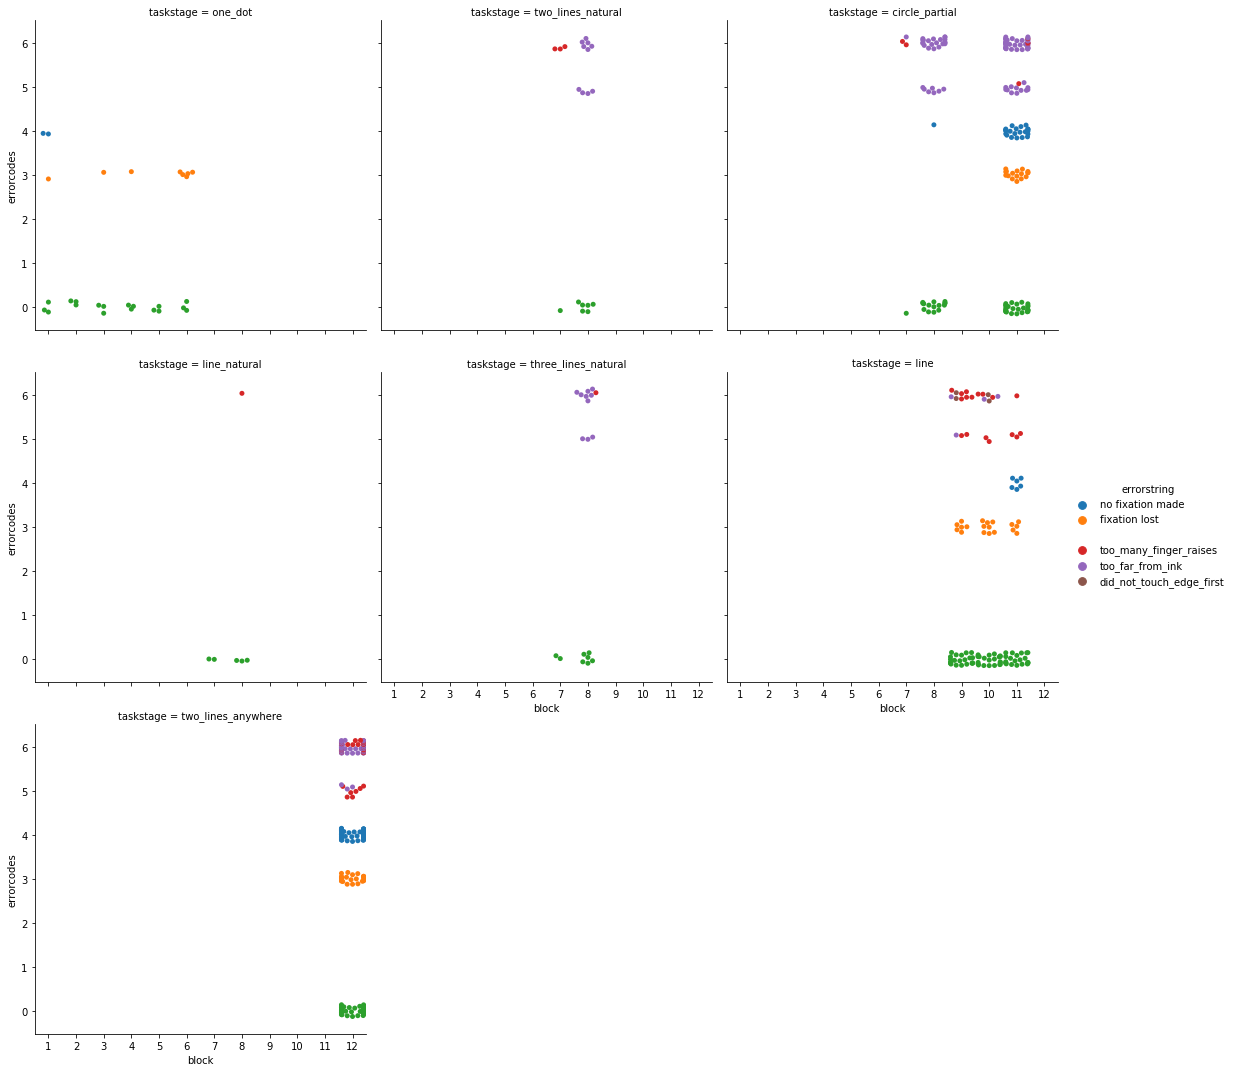

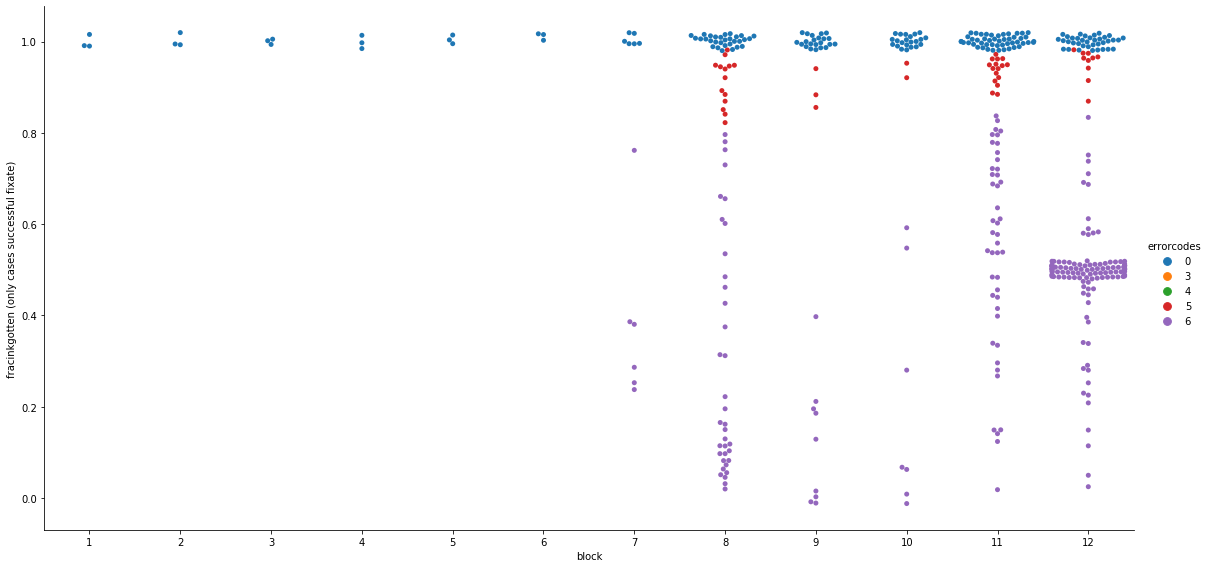

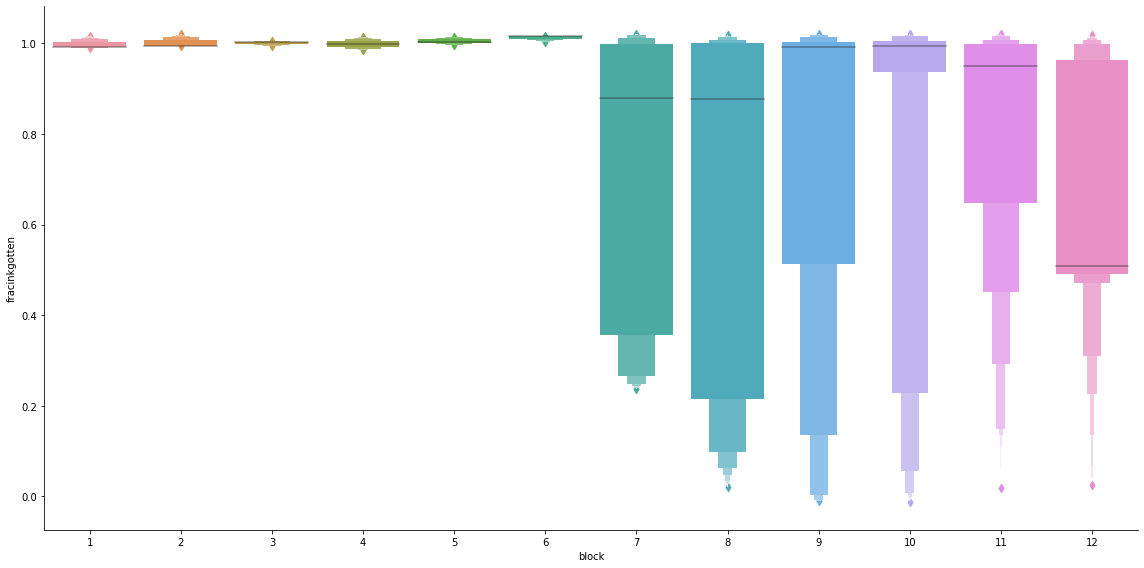

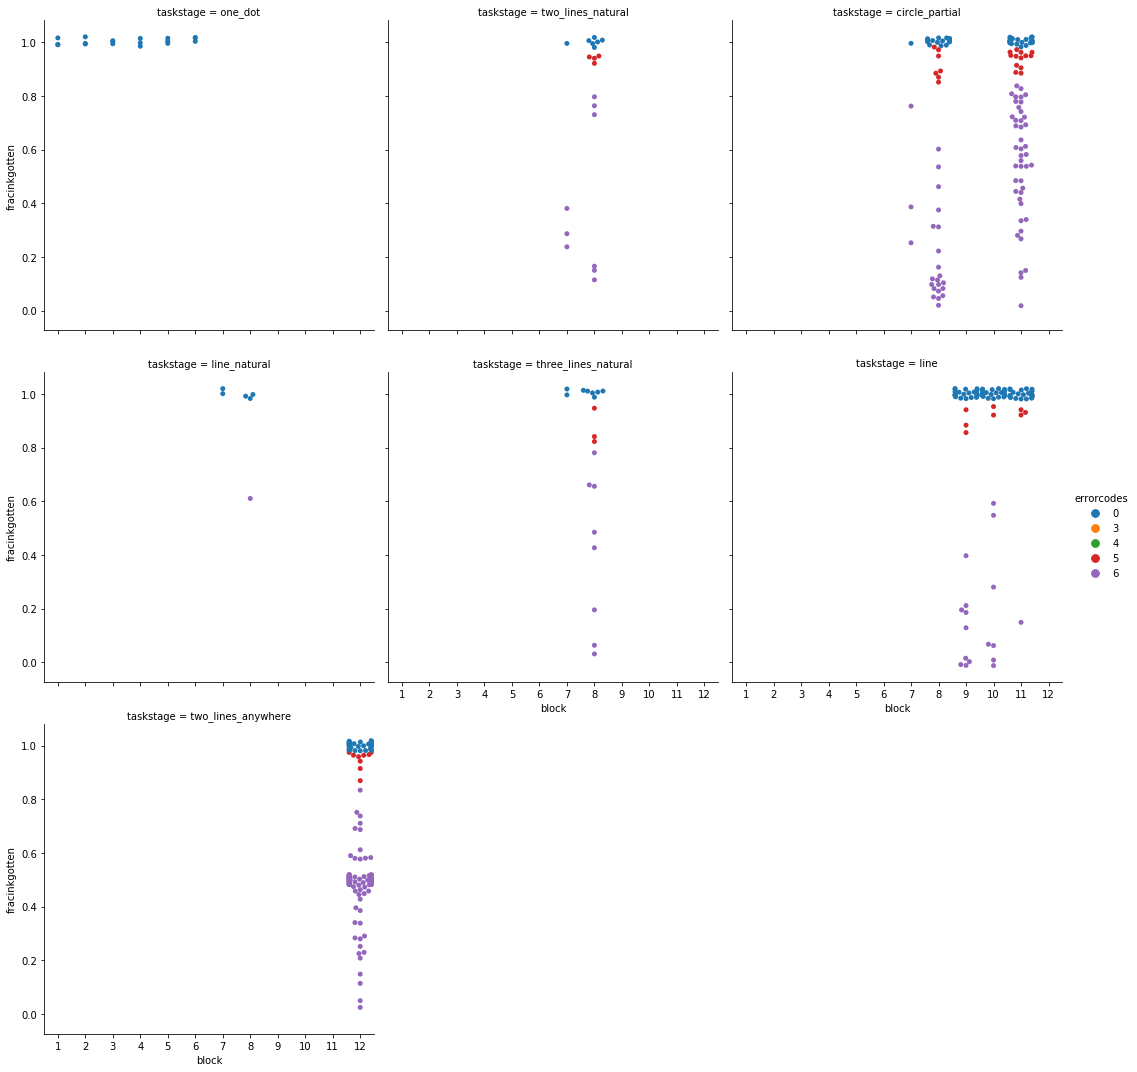

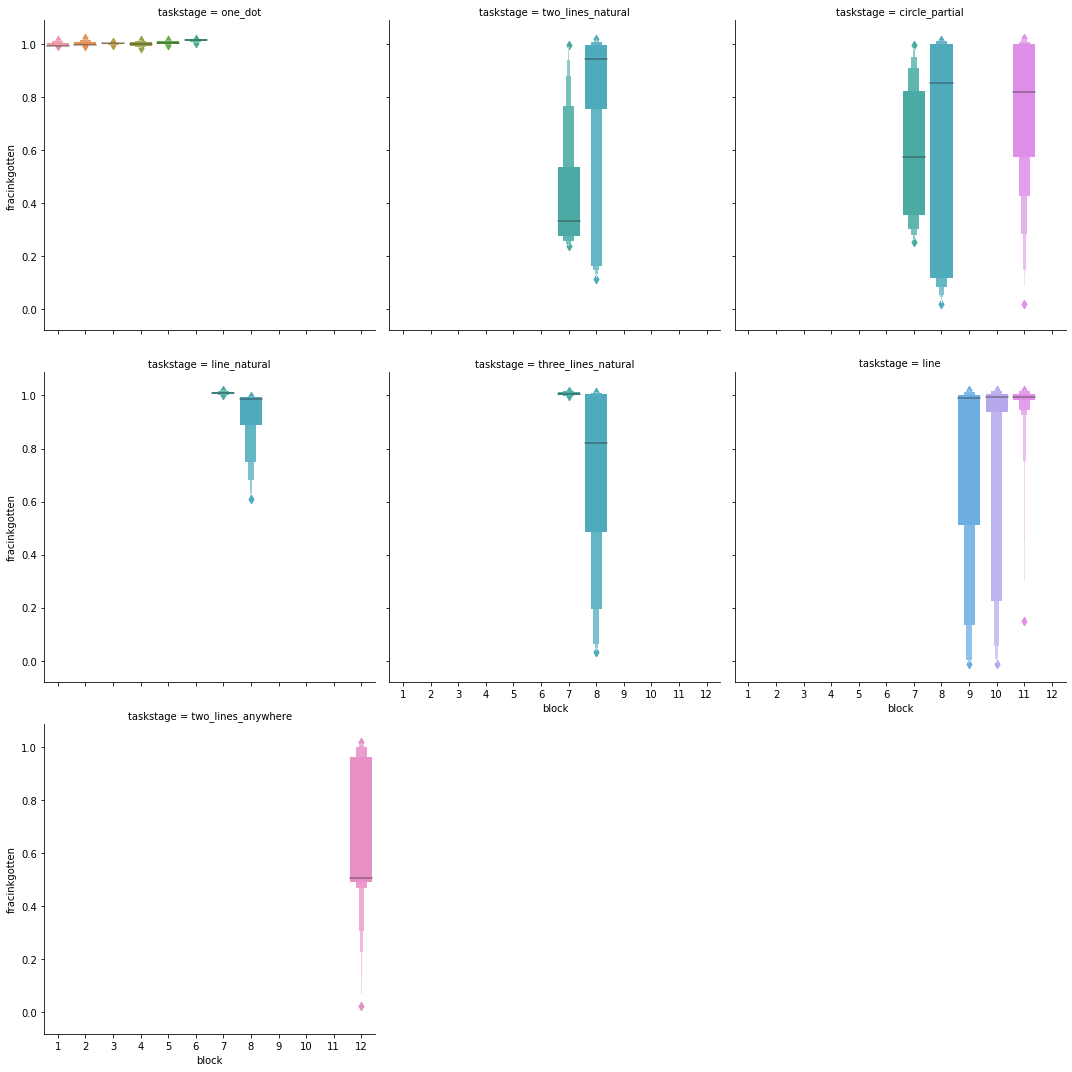

In [91]:
from tools.plots import plotAnalySessionOverview

plotAnalySessionOverview(df, filedata)


In [ ]:
trial = 
int(filedata["TrialRecord"]["BlockCount"][trial-1][0])

In [ ]:
from tools.plots import *

## for a given task type, plot all the trials
task = ["line"]
block = [9]
targ = {
    "task_stage":task,
    "block":block
}


task = ["line"]
block = [9]
fracsuccess_min = [0.8]
targ = {
    "task_stage":task,
    "block":block,
    "fracsuccess_min":fracsuccess_min
}


trials = getIndsTrials(filedata, targ)
plotMultTrialsSimple(filedata, trials)


In [ ]:
from tools.plots import *
plotTrialSimpleTimecourse(filedata, 100)

In [ ]:
plotMultTrialsSimple(filedata, trials, kind="timecourse")

In [ ]:
from tools.plots import plotTrialSimpleTimecourse
plotTrialSimpleTimecourse(filedata, 152)

In [ ]:
## smooth each stroke individually


# 1) code to plot using strokes with diff colors
trial = 400
# plotTrialSimple(filedata, trial, plotver="strokes")
plotTrialSimpleTimecourse(filedata, trial, post_go_only=False)

In [ ]:
# 2) smooth each segment
# HERE - PLOTTING EXAMPLES PRE AND POST SMOOOTHING.
import numpy as np
from tools.utils import *
import matplotlib.pyplot as plt

for _ in range(10):
    window = 0.04 # in seconds, smoothing window
    import random
    trial = random.randint(1, filedata["params"]["n_trials"])
    windowtype = "flat"
    # -- convert window (sec) to num samples
    window_len = np.ceil(window/(1/filedata["params"]["sample_rate"]))
    if window_len%2==1:
        window_len+=1
        
    print(window_len)
    
    strokes = getTrialsStrokes(filedata, trial, smooth_window=[])
    strokes_sm = getTrialsStrokes(filedata, trial, smooth_window=window)

    plt.figure()
    for s, sm in zip(strokes, strokes_sm):

     experimentOutputs/sketch/2020-04-07T18:05:14.955500/sketch_aic=1.0_arity=3_BO=False_CO=True_dp=False_doshaping=False_ES=1_ET=360_HR=0.5_it=9_MF=5_noConsol=False_parallelTest=False_pc=30_RT=360_RR=False_RW=False_st=True_solver=python_STM=True_L=1.5_TRR=default_K=2_topkNotMAP=False_tset=S12_graph=True.pickle
        plt.plot(sm[:,2], sm[:,1], '-or')

        plt.plot(s[:,2], s[:,0], '-k.')
        plt.plot(s[:,2], s[:,1], '-k.')

        

In [ ]:
# ==== plot summary of all strokes and gaps for this session.
# ---- i.e. what is structure of strokes and gaps?
strokelens_all = []
gaplens_all = []
for t in getIndsTrials(filedata):
    xyt = getTrialsTouchData(filedata, t, window_rel_go_reward=[0,0])
    if len(xyt)>0:
        A = segmentTouchDat(xyt)
        strokelens_all.extend(A[0])
        gaplens_all.extend(A[1])
    
    #     if np.any(np.array(A[0])<10):
    #         plotTrialSimple(filedata, t, post_go_only=False)
    #         plotTrialSimpleTimecourse(filedata, t)

        if np.any(np.array(A[0])<5) or np.any(np.array(A[1])<5):
            print('asfsdf')
            plotTrialSimple(filedata, t, post_go_only=False)
            plotTrialSimpleTimecourse(filedata, t) 
    

plt.figure()
plt.hist(strokelens_all, bins=1000)
plt.hist(gaplens_all, bins=1000)

    

In [ ]:
from tools.plots import plotTrialSingleOverview
    
import random
trial = random.randint(1, filedata["params"]["n_trials"])
window = 0.05

fig = plotTrialSingleOverview(filedata, trial)

In [ ]:
#######################################

(-0.6117192275544241,
 12.846103778642906,
 -7.785346856206458,
 0.0168879541349381)

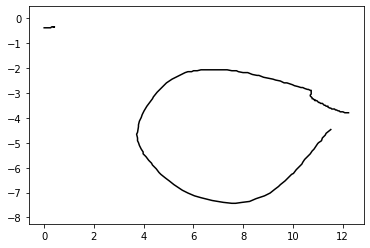

In [46]:
plt.figure()
plt.plot(dat_touch[0], dat_touch[1], '-k')
plt.axis("equal")

